In [1]:
import math
import numpy as np
import random
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
P_1 = 1/2.0
P_2 = 1/2.0
p_1 = 2/3.0
p_2 = 1/6.0
p_3 = 1/6.0
J = 6
M = 100
D = 100
mu_Z = 0
sigma_Z = 1
mu_noise = np.zeros(D)
sigma_noise = 0.01*np.identity(D)

In [3]:
def draw_phi(M):
    phi = np.zeros((M,D))
    for i in range(M):
        for d in range(D):
            r_num = random.random()
            if r_num > 0 and r_num <= P_1:
                phi[i][d] = 1
            elif r_num>P_1 and r_num<=1:
                phi[i][d] = -1
    return phi            

In [4]:
def draw_vector(D):
    u = np.zeros(D)
    for i in range(D):
        r_num = random.random()
        if r_num > 0 and r_num <= p_1:
            u[i] = 0
            continue
        if r_num > p_1 and r_num <= p_1+p_2:
            u[i] = 1
            continue
        if r_num > p_1+p_2 and r_num <= 1:
            u[i] = -1
            continue  
    return u

In [5]:
u = np.zeros((J,D))
for j in range(J):
    u[j] = draw_vector(D)

In [6]:
for i in range(J):
    u[i] = draw_vector(D)
    for k in range(i):
        dot_product = np.dot(u[i] , u[k])
        if ((dot_product) <= 0 and (dot_product == 0)):
            i = i+1
            break

In [7]:
def draw_z():
    return np.random.normal(mu_Z, sigma_Z, 2)

In [8]:
def draw_noise():
    return np.random.multivariate_normal(mu_noise, sigma_noise, 1)

In [9]:
#Component 1
def gen_component_1(u):
    z = draw_z()
    #n = draw_noise()
    X_1 = u[0] + z[0] * u[1] + z[1] * u[2]
    return X_1

#Component 2
def gen_component_2(u):
    z = draw_z()
    #n = draw_noise()
    X_2 = 2 * u[3] + math.sqrt(2) * z[0] * u[4] + z[1] * u[5]  
    return X_2

#Component 3
def gen_component_3(u):
    z = draw_z()
    #n = draw_noise()
    X_3 = math.sqrt(2) * u[5] + z[0] * (u[0]+u[1]) + (1/math.sqrt(2)) * z[1] * u[4]  
    return X_3

In [10]:
N = 2000
s = np.ndarray((N,D))
x = np.ndarray((N,D))
labels = np.zeros((N,3))
sample1_num = 0
sample2_num = 0
sample3_num = 0
for i in range(N):
    r = np.random.randint(0,3)
    if r ==0:
        sample1_num += 1
        n = draw_noise()
        s[i,:]= gen_component_1(u)
        x[i,:]= s[i,:] + n
    elif r ==1:
        sample2_num += 1
        n = draw_noise()
        s[i,:]= gen_component_2(u)
        x[i,:]= s[i,:] + n
    elif r ==2:
        sample3_num += 1
        n = draw_noise()
        s[i,:]= gen_component_2(u)
        x[i,:]= s[i,:] + n
    labels[i,r] =1

In [20]:
print(s.shape)
print(x.shape)

(2000, 100)
(2000, 100)


In [21]:
def minimum_m():
    mse_list = []
    for m in range(1,10):
        phi = draw_phi(m)
        y = np.matmul(phi,np.transpose(x))/(math.sqrt(m))
        B = np.transpose(u)
        matrix = np.matmul(phi,B)
        print(" Phi:",phi.shape," y:",y.shape," B:",B.shape," matrix:",matrix.shape)
        clf = linear_model.Lasso(alpha=1.0)
        clf.fit(matrix,y)
        a_hat = clf.coef_
        s_hat = np.matmul(a_hat,np.transpose(B))
        mean_square_error = np.linalg.norm(s_hat - s)/np.linalg.norm(s)
        mse_list.append(mean_square_error)
    plt.plot(list(range(1,10)), mse_list)
    plt.show()
    return np.argmin(mse_list)+1

In [12]:
'''
mse_list = []
for m in range(1,20):
    phi = draw_phi(m)
    mean_square_error_list=[]
    for i in range(N):
        y = np.matmul(phi,np.transpose(x[i]))/(math.sqrt(m))
        B = np.transpose(u)
        matrix = np.matmul(phi,B)
        clf = linear_model.Lasso(alpha=1.0)
        clf.fit(matrix,y)
        a_hat = clf.coef_
        s_hat = np.matmul(a_hat,np.transpose(B))
        mean_square_error = np.linalg.norm(s_hat - s)/np.linalg.norm(s)
        mean_square_error_list.append(mean_square_error)
    mse_list.append(sum(mean_square_error_list)/float(N))
'''    

'\nmse_list = []\nfor m in range(1,20):\n    phi = draw_phi(m)\n    mean_square_error_list=[]\n    for i in range(N):\n        y = np.matmul(phi,np.transpose(x[i]))/(math.sqrt(m))\n        B = np.transpose(u)\n        matrix = np.matmul(phi,B)\n        clf = linear_model.Lasso(alpha=1.0)\n        clf.fit(matrix,y)\n        a_hat = clf.coef_\n        s_hat = np.matmul(a_hat,np.transpose(B))\n        mean_square_error = np.linalg.norm(s_hat - s)/np.linalg.norm(s)\n        mean_square_error_list.append(mean_square_error)\n    mse_list.append(sum(mean_square_error_list)/float(N))\n'

 Phi: (1, 100)  y: (1, 2000)  B: (100, 6)  matrix: (1, 6)
 Phi: (2, 100)  y: (2, 2000)  B: (100, 6)  matrix: (2, 6)


C:\Users\Karma\Anaconda3\envs\tflo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


 Phi: (3, 100)  y: (3, 2000)  B: (100, 6)  matrix: (3, 6)
 Phi: (4, 100)  y: (4, 2000)  B: (100, 6)  matrix: (4, 6)
 Phi: (5, 100)  y: (5, 2000)  B: (100, 6)  matrix: (5, 6)
 Phi: (6, 100)  y: (6, 2000)  B: (100, 6)  matrix: (6, 6)
 Phi: (7, 100)  y: (7, 2000)  B: (100, 6)  matrix: (7, 6)
 Phi: (8, 100)  y: (8, 2000)  B: (100, 6)  matrix: (8, 6)
 Phi: (9, 100)  y: (9, 2000)  B: (100, 6)  matrix: (9, 6)


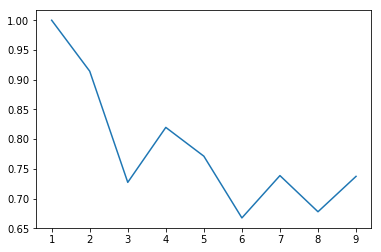

In [22]:
alpha = minimum_m()

In [14]:
phi = draw_phi(alpha)

#mean_square_error = np.linalg.norm(s_hat - s)/np.linalg.norm(s)
#mse_list.append(mean_square_error)

In [15]:
y = np.matmul(phi,np.transpose(x))/(math.sqrt(alpha))

In [16]:
lambda_list = [0.05,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
normal_mse_list=[]
normal_mse_comp1_list = []
normal_mse_comp2_list = []
normal_mse_comp3_list = []

for l in lambda_list:
    mse_list = []
    mse_list_1 = []
    mse_list_2 = []
    mse_list_3 = []
    s_1=0
    s_2=0
    s_3=0
    
    for i in range(N):
        y = np.matmul(phi,np.transpose(x[i]))/(math.sqrt(alpha))
        B = np.transpose(u)
        matrix = np.matmul(phi,B)/(math.sqrt(alpha))
        clf = linear_model.Lasso(alpha=l)
        clf.fit(matrix,y)
        a_hat = clf.coef_
        s_hat = np.matmul(B,np.transpose(a_hat))
        
        #for i in range(N):
        mse = (np.linalg.norm(s_hat - s[i])/np.linalg.norm(s[i]))**2
        index = np.where(labels[i]==1)[0]
        if index == 0: #component 1
            mse_1 = mse
            mse_list_1.append(mse_1)
            s_1+=1
        if index == 1:
            mse_2 = mse
            mse_list_2.append(mse_2)
            s_2+=1
        if index == 2:
            mse_3 = mse
            mse_list_3.append(mse_3)
            s_3+=1
        mse_list.append(mse)
        
    normal_mse = sum(mse_list)/float(len(mse_list))
    normal_mse_comp1  = sum(mse_list_1)/float(len(mse_list_1))
    normal_mse_comp2  = sum(mse_list_2)/float(len(mse_list_2))
    normal_mse_comp3  = sum(mse_list_3)/float(len(mse_list_3))
    normal_mse_list.append(normal_mse)
    normal_mse_comp1_list.append(normal_mse_comp1)
    normal_mse_comp2_list.append(normal_mse_comp2)
    normal_mse_comp3_list.append(normal_mse_comp3)

C:\Users\Karma\Anaconda3\envs\tflo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [17]:
Y = np.matmul(phi,np.transpose(x))/(math.sqrt(alpha))
Y.shape

(6, 2000)

In [18]:
sum(mse_list)

657.4874650663436

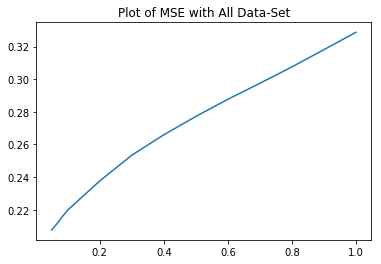

In [19]:
plt.title('Plot of MSE with All Data-Set')
plt.plot(lambda_list, normal_mse_list)
plt.show()

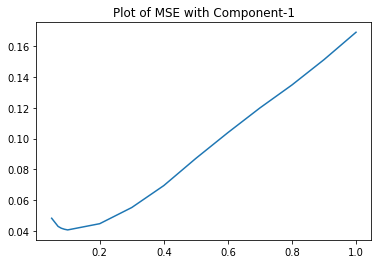

In [48]:
plt.title('Plot of MSE with Component-1')
plt.plot(lambda_list, normal_mse_comp1_list)
plt.show()

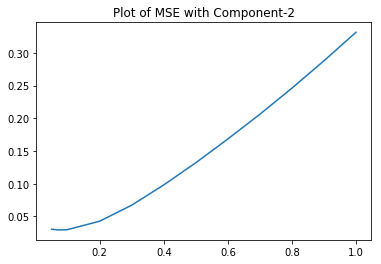

In [49]:
plt.title('Plot of MSE with Component-2')
plt.plot(lambda_list, normal_mse_comp2_list)
plt.show()

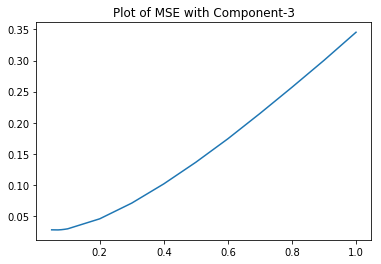

In [50]:
plt.title('Plot of MSE with Component-3')
plt.plot(lambda_list, normal_mse_comp3_list)
plt.show()

In [51]:
projected_u = np.matmul(phi,B)/math.sqrt(20)

In [52]:
projected_dist_matrix = np.zeros(shape=(J,J))
for i in range(J):
    for j in range(J):
        dist = np.linalg.norm(projected_u[:,i]-projected_u[:,j])**2
        projected_dist_matrix[i][j] =  dist  

In [53]:
dist_matrix = np.zeros(shape=(J,J))
for i in range(J):
    for j in range(J):
        dist = np.linalg.norm(u[:,i]-u[:,j])**2
        dist_matrix[i][j] =  dist 

In [54]:
dist_matrix

array([[0., 0., 3., 4., 2., 6.],
       [0., 0., 3., 4., 2., 6.],
       [3., 3., 0., 1., 5., 3.],
       [4., 4., 1., 0., 6., 6.],
       [2., 2., 5., 6., 0., 8.],
       [6., 6., 3., 6., 8., 0.]])

In [55]:
projected_dist_matrix

array([[ 0.  , 21.6 , 58.35, 15.  , 11.15, 13.95],
       [21.6 ,  0.  , 55.55, 10.2 , 19.55, 10.75],
       [58.35, 55.55,  0.  , 44.75, 40.  , 31.2 ],
       [15.  , 10.2 , 44.75,  0.  , 12.75,  9.55],
       [11.15, 19.55, 40.  , 12.75,  0.  ,  4.4 ],
       [13.95, 10.75, 31.2 ,  9.55,  4.4 ,  0.  ]])

In [56]:
Z = np.transpose(Y)

In [57]:
Z.shape

(2000, 7)

In [58]:
class_means_dict = dict()
preds_dict = dict()
k=0
# K means for different values.
for K in range(2,6):
    pred = np.zeros(shape = (N,K))
    class_means = np.zeros(shape=(K,alpha))
    # Initialize Class Means from different values from the dataset.
    #First get the random indices.
    initial_indices = np.random.choice(N,K)
    #Pick the random values from the dataset based on random initialize indices.
    for k in range(K):
        class_means[k,:] = Z[initial_indices[k],:]
    old_class_means = np.zeros(shape=(K,alpha)) 
    
    while np.linalg.norm(old_class_means-class_means)/np.linalg.norm(class_means) > 0.001:
        old_class_means = np.array(class_means)
        for i in range(N): # Iterate over the dataset.
            distances_to_mean = np.zeros(K)
            # For each point in dataset compute the distance from the means.
            for k in range(K):
                distances_to_mean[k] = np.linalg.norm(class_means[k]-Z[i])
            nearest_mean = np.argmin(distances_to_mean)
            #Re-intialize the means
            pred[i,:]=np.zeros(K)
            # Update the means.
            pred[i,nearest_mean]=1
        #compute the new class means.
        for k in range(K):
            class_means[k] = np.mean(Z[np.where(pred[:,k]==1)],axis=0)

    class_means_dict[K] = class_means
    preds_dict[K] = pred
    np.set_printoptions(precision=2)
    probabilities = np.ndarray((3,K))
    print K
    for predicted in range(K):
        for true_label in range(3):
            probabilities[true_label,predicted]=np.intersect1d(np.where(labels[:,true_label]==1),np.where(pred[:,predicted]==1)).size/float(np.where(labels[:,true_label]==1)[0].size)
            print "%.2f" %probabilities[true_label,predicted], 
        print '\n'

2
0.00 0.54 0.59 

1.00 0.46 0.41 

3
0.40 0.00 0.00 

0.00 0.54 0.59 

0.60 0.46 0.41 

4
0.53 0.00 0.00 

0.02 0.52 0.47 

0.45 0.00 0.00 

0.00 0.48 0.53 

5
0.45 0.00 0.00 

0.00 0.29 0.22 

0.03 0.44 0.49 

0.52 0.00 0.00 

0.00 0.27 0.30 

